# 二分探索木

## 二分探索木：問題にチャレンジする前に

### トレードオフ


| データ構造              | 探索        | 挿入        | 削除        |
|-------------------------|-------------|-------------|-------------|
| 配列（Python のリスト） | $O(n)$      | $O(n)$      | $O(n)$      |
| 整列済み配列            | $O(\log n)$ | $O(n)$      | $O(n)$      |
| 双方向連結リスト        | $O(n)$      | $O(1)$      | $O(1)$      |
| **二分探索木**          | $O(\log n)$ | $O(\log n)$ | $O(\log n)$ |

### クラス図


この資料の最後（全てのクラスが定義できたもの）のコードをAIに渡して，次のプロンプトを実行する。

> Google Colab内で有効なクラス図を描いて<br>（ここにコードを貼り付ける）

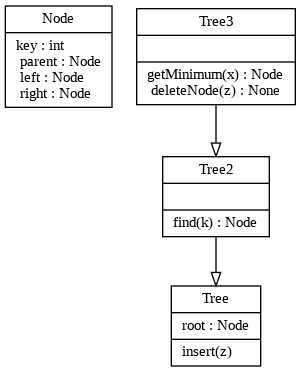

In [1]:
# ------------------ クラス図を描くセル ------------------
from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph(comment='BST Classes', format='png')
dot.attr('node', shape='record', fontsize='11')

# 各クラス（フィールド／主なメソッドは必要に応じて省略・追加可）
dot.node('Node',
          '{Node| key : int\\l parent : Node\\l left : Node\\l right : Node\\l}')

dot.node('Tree',
          '{Tree| root : Node\\l| insert(z)\\l}')

dot.node('Tree2',
          '{Tree2| | find(k) : Node\\l}')

dot.node('Tree3',
          '{Tree3| | getMinimum(x) : Node\\l deleteNode(z) : None\\l}')

# 継承（open-arrow で「空継承」を表現）
dot.edge('Tree2', 'Tree', arrowhead='empty')
dot.edge('Tree3', 'Tree2', arrowhead='empty')

# 描画して Colab 上に表示
diagram_path = dot.render(filename='bst_classes')
display(Image(filename=diagram_path))

## 二分探索木：挿入


問題：[ALDS1_8_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/8/ALDS1_8_A) (Binary Search Tree I)

ちなみに，中間順巡回と先行順巡回を確認して後行順巡回を確認しないのは，前の二つだけ木が決まるからである（教科書8.5節を参照）。

In [1]:
%%writefile input.dat
8
insert 30
insert 88
insert 12
insert 1
insert 20
insert 17
insert 25
print

Writing input.dat


In [ ]:
%%writefile test.py
def preParse(u):
  if u is None: return
  print(f' {u.key}', end='')
  preParse(u.left)
  preParse(u.right)

def inParse(u):
  if u is None: return
  inParse(u.left)
  print(f' {u.key}', end='')
  inParse(u.right)

class Node:
  def __init__(self, key):
    self.key = key
    self.parent = None
    self.left = None
    self.right = None

class Tree:
  def __init__(self):
    self.root = None

  def insert(self, z):
    x = self.root
    y = None    #yは親
    while x is not None:
      y = x     #xがそのまま親に
      if z.key < x.key: x = x.left
      else: x = x.right
    z.parent = y　　#君の親はyだよ
    if y is None: self.root = z
    elif z.key < y.key: y.left = z
    else: y.right = z

n = int(input())
T = Tree()
# T2 = Tree() # もう1本必要なら作ればよい。

for _ in range(n):
  com = input().split() #insertのメソッドを考える



In [ ]:
!python3 test.py < input.dat

## 二分探索木：探索


問題：[ALDS1_8_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/8/ALDS1_8_B) (Binary Search Tree II)

In [ ]:
%%writefile input.dat
10
insert 30
insert 88
insert 12
insert 1
insert 20
find 12
insert 17
insert 25
find 16
print

In [ ]:
%%writefile test.py
# preParse, inParse の定義（前と同じ）

# Nodeの定義（前と同じ）

# Treeの定義（前と同じ）

class Tree2(Tree):
  def find(self, k):
    x = self.root
    while x is not None and k != x.key:
      if k < x.key: x = x.left
      else: x = x.right
    return x

n = int(input())
T = Tree2()

for _ in range(n):
  com = input().split()
  # insertとprint（前と同じ）
  # findについて，自分で書く。

In [ ]:
!python3 test.py < input.dat

## 二分探索木：削除


問題：[ALDS1_8_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/8/ALDS1_8_C) (Binary Search Tree III)

In [ ]:
%%writefile input.dat
18
insert 8
insert 2
insert 3
insert 7
insert 22
insert 1
find 1
find 2
find 3
find 4
find 5
find 6
find 7
find 8
print
delete 3
delete 7
print

In [ ]:
%%writefile test.py
# Tree2の定義までは前と同じ

class Tree3(Tree2):
  def getMinimum(self, x):
    while x.left is not None: x = x.left
    return x

  def deleteNode(self, z):
    if z.left is None or z.right is None:
      y = z
    else:
      y = self.getMinimum(z.right) # 教科書のgetSuccessor()は不要

    # y に残っている唯一の子を x とする
    x = y.left if y.left is not None else y.right

    # x が存在すれば親ポインタを貼り替え
    if x is not None: x.parent = y.parent

    # 木の根または親の子ポインタを置換（transplant）
    if y.parent is None: self.root = x
    elif y == y.parent.left: y.parent.left = x
    else: y.parent.right = x

    # もし “論理的に削除したいノード” と “実際に削除したノード”が異なればキーをコピーして完了
    if y != z: z.key = y.key

n = int(input())
T = Tree3()

for _ in range(n):
  com = input().split()
  #findの処理まで前と同じ
  #deleteについて，自分で書く。

In [ ]:
!python3 test.py < input.dat